In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter
import seaborn as sns

pd.set_option("display.max_rows", None)

print("Pandas version: {}".format(pd.__version__))
print("NumPy version: {}".format(np.__version__))

Pandas version: 2.2.3
NumPy version: 2.1.1


In [2]:
result_dir = "../results/tcpreplay"
fig_dir = "./figures/realtime"
exporters = [
    "argus",
    # "cicflowmeter",
    # "go-flows",
    "nfstream",
    "nprobe",
    "zeek",
    "joy",
    # "kitsune",
    "rustiflow-basic",
    "rustiflow-rustiflow"]


label_fmt = {
    "cicflowmeter": "CICFlowMeter",
    "zeek": "Zeek",
    "nfstream": "NFStream",
    "nprobe": "nProbe",
    "argus": "Argus",
    "go-flows": "Go-Flows",
    "rustiflow": "RustiFlow",
    "joy": "Joy",
    "kitsune": "Kitsune",
}

In [3]:
df_all = pd.DataFrame()
for exporter in exporters:
    df = pd.read_csv(f"{result_dir}/{exporter}/summary_metrics.csv")
    if exporter == "rustiflow-basic":
        df["Extractor"] = "rustiflow-basic"
    df_all = pd.concat([df_all, df])

In [4]:
df_all.head()

,DateTime,Extractor,Folder,Interface,Throughput,Runtime (s),Avg_CPU_Usage (%),Avg_Memory_Usage (MB),Max_Memory_Usage (MB),CPU Cores,CPU Logical Cores,Total Memory (MB),Available Memory (MB)
0,2025-02-23 16:06:45,argus,/users/mverkerk/RustiFlow-experiments/results/...,eno3,1,302.347210,0.246667,149.970560,154.582031,16,32,48228.445312,45613.007812
1,2025-02-23 16:11:50,argus,/users/mverkerk/RustiFlow-experiments/results/...,eno3,10,302.350082,0.491639,159.253854,163.308594,16,32,48228.445312,45612.359375
2,2025-02-23 16:16:55,argus,/users/mverkerk/RustiFlow-experiments/results/...,eno3,100,302.341234,2.940468,167.384851,180.238281,16,32,48228.445312,45619.988281
3,2025-02-23 16:22:01,argus,/users/mverkerk/RustiFlow-experiments/results/...,eno3,1000,287.244776,83.754225,1138.339981,2515.738281,16,32,48228.445312,45620.839844
4,2025-02-23 16:26:51,argus,/users/mverkerk/RustiFlow-experiments/results/...,eno3,10000,167.569170,135.491566,1361.403873,2860.726562,16,32,48228.445312,45620.867188


In [5]:
df_all.groupby(["Extractor", "Throughput"])[
    [
        "Runtime (s)",
        "Avg_CPU_Usage (%)",
        "Avg_Memory_Usage (MB)",
        "Max_Memory_Usage (MB)",
    ]
].agg(["mean"]).round(1)

Runtime (s) Avg_CPU_Usage (%)  \
                                  mean              mean   
Extractor       Throughput                                 
argus           1                302.3               0.2   
                10               302.4               0.5   
                100              302.3               2.9   
                1000             287.2              83.8   
                10000            167.6             135.5   
joy             1                297.4               0.1   
                10               297.3               0.3   
                100              297.4               4.6   
                1000             282.8              98.2   
                10000            163.5              98.2   
nfstream        1                297.5               0.6   
                10               297.5               1.6   
                100              297.5              10.2   
                1000             282.4             209.2   
                10000            162.6             324.4   
nprobe          1                301.3               3.9   
                10               301.2               4.2   
                100              301.3               5.2   
                1000             294.4              49.7   
                10000            175.3              62.7   
rustiflow       1                297.4               1.6   
                10               297.4               5.1   
                100              297.7              16.9   
                1000             292.3             182.8   
                10000            165.7             232.5   
rustiflow-basic 1                297.4               1.5   
                10               297.4               4.0   
                100              297.4              15.3   
                1000             283.2             137.9   
                10000            156.5             196.2   
zeek            1                297.5               1.9   
                10               297.5               3.9   
                100              297.5              14.6   
                1000             297.7              98.6   
                10000            183.6             108.3   

                           Avg_Memory_Usage (MB) Max_Memory_Usage (MB)  
                                            mean                  mean  
Extractor       Throughput                                              
argus           1                          150.0                 154.6  
                10                         159.3                 163.3  
                100                        167.4                 180.2  
                1000                      1138.3                2515.7  
                10000                     1361.4                2860.7  
joy             1                           18.0                  21.6  
                10                          26.7                  40.2  
                100                         58.4                  72.2  
                1000                       193.7                 293.7  
                10000                      195.7                 289.9  
nfstream        1                         1544.9                1566.0  
                10                        1553.6                1567.5  
                100                       1581.9                1629.4  
                1000                      2987.3                5268.6  
                10000                     3079.2                5229.1  
nprobe          1                           97.0                 137.2  
                10                         208.6                 243.0  
                100                        395.9                 597.6  
                1000                     13415.0               20217.8  
                10000                    11889.6               17752.2  
rustiflow       1                          129.1                 13

In [132]:
table_df = df_all.groupby(["Extractor", "Throughput"])[
    ["Avg_CPU_Usage (%)", "Avg_Memory_Usage (MB)", "Max_Memory_Usage (MB)"]
].agg(
    ["mean"]
)  # , "std"])
print(table_df.style.format(precision=1).to_latex())

\begin{tabular}{llrrr}
 &  & Avg_CPU_Usage (%) & Avg_Memory_Usage (MB) & Max_Memory_Usage (MB) \\
 &  & mean & mean & mean \\
Extractor & Throughput &  &  &  \\
\multirow[c]{5}{*}{argus} & 1 & 0.2 & 150.0 & 154.6 \\
 & 10 & 0.5 & 159.3 & 163.3 \\
 & 100 & 2.9 & 167.4 & 180.2 \\
 & 1000 & 83.8 & 1138.3 & 2515.7 \\
 & 10000 & 135.5 & 1361.4 & 2860.7 \\
\multirow[c]{5}{*}{joy} & 1 & 0.1 & 18.0 & 21.6 \\
 & 10 & 0.3 & 26.7 & 40.2 \\
 & 100 & 4.6 & 58.4 & 72.2 \\
 & 1000 & 98.2 & 193.7 & 293.7 \\
 & 10000 & 98.2 & 195.7 & 289.9 \\
\multirow[c]{5}{*}{nfstream} & 1 & 0.6 & 1544.9 & 1566.0 \\
 & 10 & 1.6 & 1553.6 & 1567.5 \\
 & 100 & 10.2 & 1581.9 & 1629.4 \\
 & 1000 & 209.2 & 2987.3 & 5268.6 \\
 & 10000 & 324.4 & 3079.2 & 5229.1 \\
\multirow[c]{5}{*}{nprobe} & 1 & 3.9 & 97.0 & 137.2 \\
 & 10 & 4.2 & 208.6 & 243.0 \\
 & 100 & 5.2 & 395.9 & 597.6 \\
 & 1000 & 49.7 & 13415.0 & 20217.8 \\
 & 10000 & 62.7 & 11889.6 & 17752.2 \\
\multirow[c]{5}{*}{rustiflow} & 1 & 1.6 & 129.1 & 136.0 \\
 & 10 & 5.1

In [6]:
colors = [
    "#6C8EBF",
    "#82B366",
    "#D6B656",
    "#B85450",
    "#9673A6",
    "#fba559",
    "#ae8982",
    "#e89fd2",
    "#656565",
    "#D1B07C",
]
color_map = {
    "argus": colors[0],
    "cicflowmeter": colors[1],
    "go-flows": colors[2],
    "rustiflow": colors[3],
    "nprobe": colors[4],
    "nfstream": colors[5],
    "zeek": colors[6],
    "ntlflowlyzer": colors[7],
    "joy": colors[8],
    "kitsune": colors[9],
}
sns.color_palette(colors)

[(0.4235294117647059, 0.5568627450980392, 0.7490196078431373),
 (0.5098039215686274, 0.7019607843137254, 0.4),
 (0.8392156862745098, 0.7137254901960784, 0.33725490196078434),
 (0.7215686274509804, 0.32941176470588235, 0.3137254901960784),
 (0.5882352941176471, 0.45098039215686275, 0.6509803921568628),
 (0.984313725490196, 0.6470588235294118, 0.34901960784313724),
 (0.6823529411764706, 0.5372549019607843, 0.5098039215686274),
 (0.9098039215686274, 0.6235294117647059, 0.8235294117647058),
 (0.396078431372549, 0.396078431372549, 0.396078431372549),
 (0.8196078431372549, 0.6901960784313725, 0.48627450980392156)]

# Metrics during experiment

In [10]:
throughputs = {
    1: "1Mbps",
    10: "10Mbps",
    100: "100Mbps",
    1000: "1Gbps",
    10000: "10Gbps",
}
df_realtime = pd.DataFrame()
for exporter in exporters:
    for throughput in throughputs.keys():
        exporter_name = "rustiflow" if exporter in ["rustiflow-basic", "rustiflow-rustiflow"] else exporter
        df = pd.read_csv(
            f"{result_dir}/{exporter}/{exporter_name}_realtime_iperf3_{throughput}_metrics.csv"
        )
        df["Extractor"] = "rustiflow" if exporter == "rustiflow-rustiflow" else exporter
        df["Throughput"] = throughput
        df_realtime = pd.concat([df_realtime, df])

In [8]:
df_realtime.head()

,Interval,CPU_Usage (%),Memory_Usage (MB),CPU_Num,Num_Threads,Open_Files,Context_Switches,Child Processes,Extractor,Throughput
0,1,0.0,4.511719,"[22, 15]",2,1,3,1,argus,1
1,2,0.0,149.558594,"[22, 15, 9, 15, 27]",7,3,20,4,argus,1
2,3,0.0,149.808594,"[22, 15, 9, 15, 27]",7,3,28,4,argus,1
3,4,0.0,149.808594,"[22, 15, 9, 15, 27]",7,3,36,4,argus,1
4,5,1.0,149.808594,"[22, 15, 9, 15, 27]",7,3,44,4,argus,1


Throughput: 1Mbps


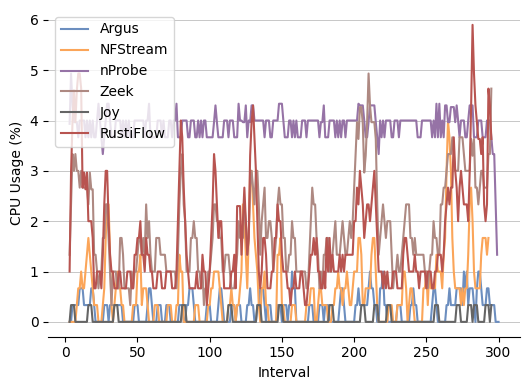

Throughput: 10Mbps


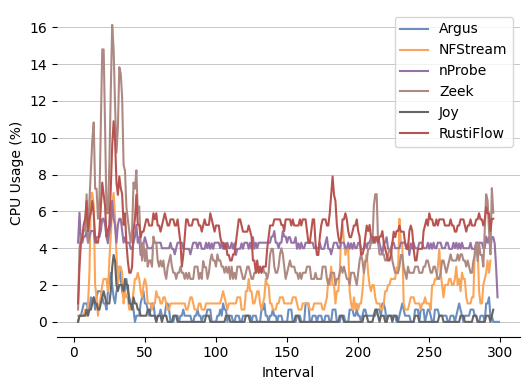

Throughput: 100Mbps


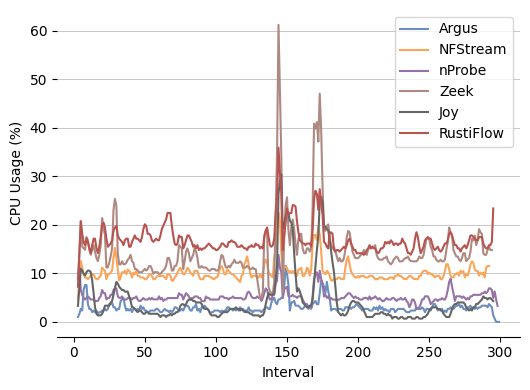

Throughput: 1Gbps


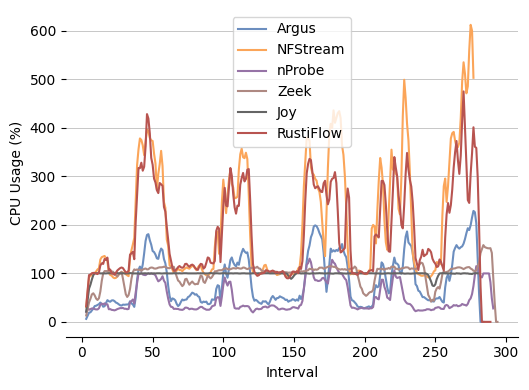

Throughput: 10Gbps


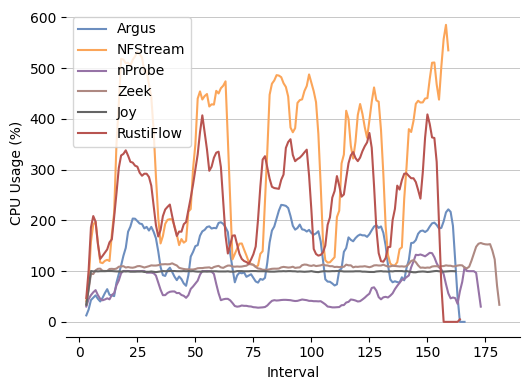

Throughput: 1Mbps


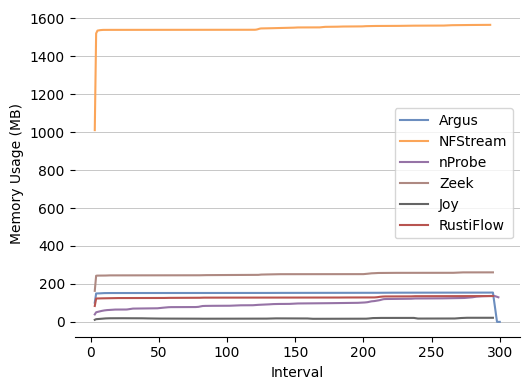

Throughput: 10Mbps


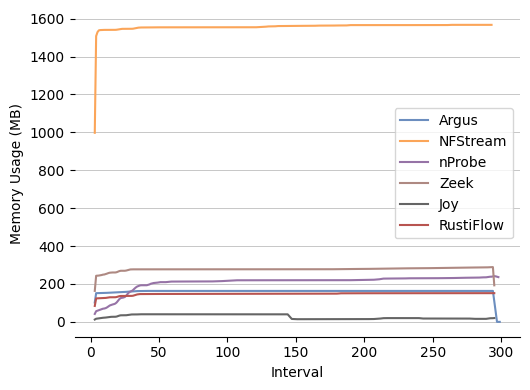

Throughput: 100Mbps


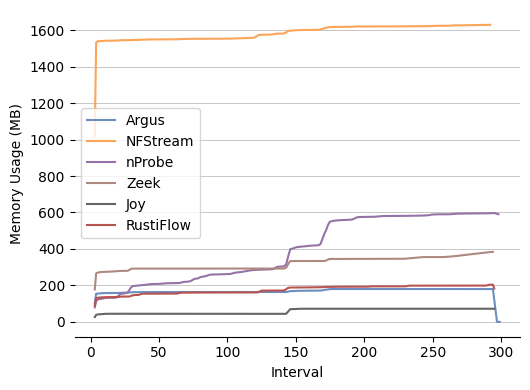

Throughput: 1Gbps


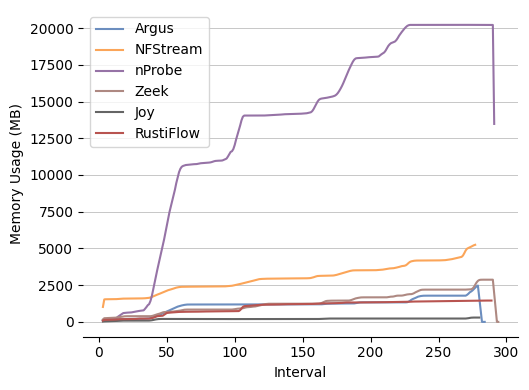

Throughput: 10Gbps


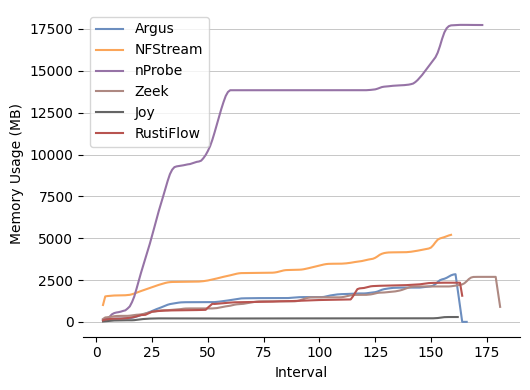

In [14]:
exporters = [
    "argus",
    # "cicflowmeter",
    # "go-flows",
    "nfstream",
    "nprobe",
    "zeek",
    "joy",
    # "kitsune",
    "rustiflow",
]

for metric in ["CPU_Usage (%)", "Memory_Usage (MB)"]:
    for throughput in throughputs.keys():
        print(f"Throughput: {throughputs[throughput]}")
        # Plot Memory Usage over Interval
        fig, ax = plt.subplots(figsize=(5.4, 4))
        ax.yaxis.grid(True, linewidth=0.5)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(True)

        for exporter in exporters:
            df = df_realtime[
                (df_realtime["Extractor"] == exporter)
                & (df_realtime["Throughput"] == throughput)
            ]
            ax.plot(
                df["Interval"],
                df[metric].rolling(window=3).mean(),
                # marker=".",
                linestyle="-",
                label=label_fmt[exporter],
                color=color_map[exporter],
            )

        ax.set_xlabel("Interval")
        ax.set_ylabel(
            "CPU Usage (%)" if metric == "CPU_Usage (%)" else "Memory Usage (MB)"
        )
        ax.legend()
        plt.tight_layout()
        plt.show()

# Cleaned metrics for 1Gbps

In [15]:
clean_exporters = ["argus", "nfstream", "nprobe", "zeek", "joy", "rustiflow-rustiflow"]
df_clean = pd.DataFrame()
for exporter in clean_exporters:
    exporter_name = (
        "rustiflow"
        if exporter in ["rustiflow-basic", "rustiflow-rustiflow"]
        else exporter
    )
    df = pd.read_csv(
        f"{result_dir}/{exporter}/clean_1000_metrics.csv"
    )
    df["Extractor"] = "rustiflow" if exporter == "rustiflow-rustiflow" else exporter
    df["Throughput"] = 1000
    df_clean = pd.concat([df_clean, df])
df_clean.head()

,Interval,CPU_Usage (%),Memory_Usage (MB),CPU_Num,Num_Threads,Open_Files,Context_Switches,Child Processes,Extractor,Throughput
0,1,0.0,4.214844,"[23, 26]",2,1,3,1,argus,1000
1,2,0.0,152.585938,"[23, 26, 27, 12, 13]",7,3,19,4,argus,1000
2,3,18.7,153.101562,"[23, 26, 27, 12, 13]",7,3,27,4,argus,1000
3,4,18.7,153.617188,"[23, 26, 27, 12, 13]",7,3,35,4,argus,1000
4,5,19.7,153.875000,"[23, 26, 27, 12, 13]",7,3,43,4,argus,1000


Throughput: 1Gbps


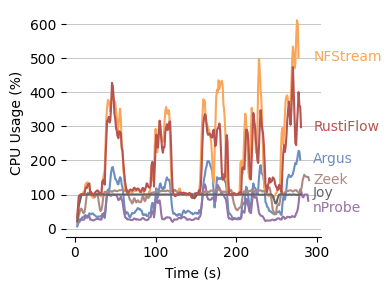

In [12]:
# for metric in ["CPU_Usage (%)", "Memory_Usage (MB)"]:

throughput = 1000
print(f"Throughput: {throughputs[throughput]}")
# Plot Memory Usage over Interval
fig, ax = plt.subplots(figsize=(4, 3))
ax.yaxis.grid(True, linewidth=0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(True)

label_offsets = {
    "zeek": 0,
    "nfstream": 0,
    "nprobe": -20,
    "argus": 0,
    "rustiflow": 0,
    "joy": 5,
}

for exporter in ["argus", "nfstream", "nprobe", "zeek", "joy", "rustiflow"]:
    df = df_clean[
        (df_clean["Extractor"] == exporter) & (df_clean["Throughput"] == throughput)
    ]
    (line,) = ax.plot(
        df["Interval"],
        df["CPU_Usage (%)"].rolling(window=3).mean(),
        # marker=".",
        linestyle="-",
        label=label_fmt[exporter],
        color=color_map[exporter],
    )

    # Add exporter name next to the last data point in the same color
    ax.text(
        295,
        line.get_ydata()[-1] + label_offsets[exporter],
        label_fmt[exporter],
        color=line.get_color(),
        verticalalignment="center",
    )

ax.set_xlabel("Time (s)")
ax.set_ylabel("CPU Usage (%)")
plt.tight_layout()
plt.savefig(f"{fig_dir}/1000_cpu.pdf", bbox_inches="tight")
plt.show()

Throughput: 1GB


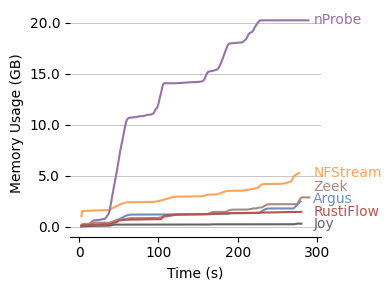

In [125]:
throughput = 1000
print(f"Throughput: {throughputs[throughput]}")
# Plot Memory Usage over Interval
fig, ax = plt.subplots(figsize=(4, 3))
ax.yaxis.grid(True, linewidth=0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(True)

label_offsets = {
    "zeek": 1000,
    "nfstream": 0,
    "nprobe": 0,
    "argus": 250,
    "rustiflow": 0,
    "joy": 0,
}

for exporter in ["argus", "nfstream", "nprobe", "zeek", "joy", "rustiflow"]:
    df = df_clean[
        (df_clean["Extractor"] == exporter) & (df_clean["Throughput"] == throughput)
    ]
    (line,) = ax.plot(
        df["Interval"],
        df["Memory_Usage (MB)"].rolling(window=3).mean(),
        # marker=".",
        linestyle="-",
        label=label_fmt[exporter],
        color=color_map[exporter],
    )

    # Add exporter name next to the last data point in the same color
    ax.text(
        295,
        line.get_ydata()[-1] + label_offsets[exporter],
        label_fmt[exporter],
        color=line.get_color(),
        verticalalignment="center",
    )

ax.set_xlabel("Time (s)")
ax.set_ylabel("Memory Usage (GB)")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x / 1000:.1f}"))
plt.tight_layout()
plt.savefig(f"{fig_dir}/1000_mem.pdf", bbox_inches="tight")
plt.show()

# plot exporter results in function of throughput

argus: Throughput
1         154.582031
10        163.308594
100       180.238281
1000     2515.738281
10000    2860.726562
Name: Max_Memory_Usage (MB), dtype: float64
nfstream: Throughput
1        1566.007812
10       1567.453125
100      1629.367188
1000     5268.605469
10000    5229.105469
Name: Max_Memory_Usage (MB), dtype: float64
nprobe: Throughput
1          137.203125
10         243.042969
100        597.589844
1000     20217.832031
10000    17752.207031
Name: Max_Memory_Usage (MB), dtype: float64
zeek: Throughput
1         261.308594
10        290.195312
100       385.144531
1000     2871.203125
10000    2688.976562
Name: Max_Memory_Usage (MB), dtype: float64
joy: Throughput
1         21.609375
10        40.156250
100       72.210938
1000     293.738281
10000    289.914062
Name: Max_Memory_Usage (MB), dtype: float64
rustiflow: Throughput
1         136.011719
10        151.566406
100       204.105469
1000     1450.585938
10000    2340.281250
Name: Max_Memory_Usage (MB), dtype: f

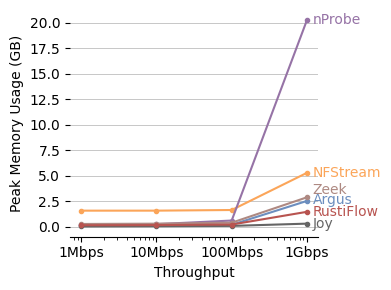

In [16]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(4, 3))
ax.yaxis.grid(True, linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

label_offsets = {
    "zeek": 750,
    "nfstream": 0,
    "nprobe": 0,
    "argus": 50,
    "rustiflow": 0,
    "joy": 0,
}

for exporter in exporters:
    df = df_all[df_all['Extractor'] == exporter].groupby('Throughput')['Max_Memory_Usage (MB)'].mean()

    print(f"{exporter}: {df}")
    (line, ) = ax.plot(
        df.index[:-1],
        df[:-1],
        marker=".",
        linestyle="-",
        label=label_fmt[exporter],
        color=color_map[exporter],
    )

    # Add exporter name next to the last data point in the same color
    ax.text(
        1200,
        line.get_ydata()[-1] + label_offsets[exporter],
        label_fmt[exporter],
        color=line.get_color(),
        verticalalignment="center",
    )

ax.set_xscale("log")  # Set x-axis to logarithmic scale
ax.set_xticks(list(throughputs.keys())[:-1])
ax.set_xticklabels(list(throughputs.values())[:-1])
ax.set_yticks([0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000])
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1000:.1f}'))
ax.set_xlabel('Throughput')
ax.set_ylabel('Peak Memory Usage (GB)')
# ax.legend()
plt.tight_layout()
plt.savefig(f'{fig_dir}/mem_vs_throughput.pdf', bbox_inches='tight')
plt.show()

argus: Throughput
1          0.246667
10         0.491639
100        2.940468
1000      83.754225
10000    135.491566
Name: Avg_CPU_Usage (%), dtype: float64
nfstream: Throughput
1          0.607509
10         1.646416
100       10.157534
1000     209.217329
10000    324.384906
Name: Avg_CPU_Usage (%), dtype: float64
nprobe: Throughput
1         3.884615
10        4.235570
100       5.207047
1000     49.681443
10000    62.675145
Name: Avg_CPU_Usage (%), dtype: float64
zeek: Throughput
1          1.885085
10         3.862712
100       14.635374
1000      98.615646
10000    108.282320
Name: Avg_CPU_Usage (%), dtype: float64
joy: Throughput
1         0.057627
10        0.270847
100       4.577627
1000     98.232500
10000    98.209877
Name: Avg_CPU_Usage (%), dtype: float64
rustiflow: Throughput
1          1.612881
10         5.054237
100       16.909492
1000     182.825260
10000    232.521341
Name: Avg_CPU_Usage (%), dtype: float64


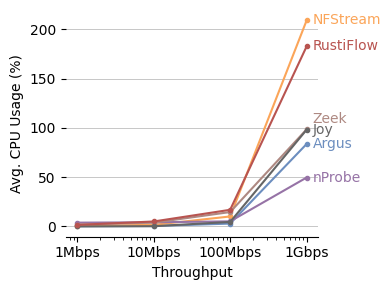

In [17]:
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(4, 3))
ax.yaxis.grid(True, linewidth=0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(True)

label_offsets = {
    "zeek": 10,
    "nfstream": 0,
    "nprobe": 0,
    "argus": 0,
    "rustiflow": 0,
    "joy": 0,
}

for exporter in exporters:
    df = (
        df_all[df_all["Extractor"] == exporter]
        .groupby("Throughput")["Avg_CPU_Usage (%)"]
        .mean()
    )

    print(f"{exporter}: {df}")
    (line, ) = ax.plot(
        df.index[:-1],
        df[:-1],
        marker=".",
        linestyle="-",
        label=label_fmt[exporter],
        color=color_map[exporter],
    )

    # Add exporter name next to the last data point in the same color
    ax.text(
        1200,
        line.get_ydata()[-1] + label_offsets[exporter],
        label_fmt[exporter],
        color=line.get_color(),
        verticalalignment="center",
    )


ax.set_xscale("log")  # Set x-axis to logarithmic scale
ax.set_xticks(list(throughputs.keys())[:-1])
ax.set_xticklabels(list(throughputs.values())[:-1])
ax.set_xlabel("Throughput")
ax.set_ylabel("Avg. CPU Usage (%)")
# ax.legend()
plt.tight_layout()
plt.savefig(f"{fig_dir}/cpu_vs_throughput.pdf", bbox_inches="tight")
plt.show()